<a href="https://colab.research.google.com/github/alibekk93/PWM-for-Secondary-Structure/blob/main/PWM_for_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PWM for SS

## Setup

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
SS_TYPES_3 = ['C', 'E', 'H']
SS_TYPES_8 = ['B', 'C', 'E', 'G', 'H', 'I', 'S', 'T']

In [34]:
SS_TYPES = SS_TYPES_3

CHAR_TO_INDEX = {ss:i for i, ss in enumerate(SS_TYPES)}

In [29]:
seqs = ['HHHCCCEEE', 'CCCCCEHH', 'EEHCCCEHH', 'CCHCCCECC']

In [30]:
all_seqs = ''.join(seqs)

In [53]:
background_freqs = [all_seqs.count(ss)/len(all_seqs) for ss in SS_TYPES]

In [36]:
counts = np.zeros((len(seqs[0]), len(SS_TYPES)))
for seq in seqs:
    for i, char in enumerate(seq):
        index = CHAR_TO_INDEX[char]
        counts[i, index] += 1

In [56]:
pwm = np.zeros_like(counts)
for i in range(len(SS_TYPES)):
    pwm[:, i] = np.log(counts[:, i]/sum(counts[:, i])/background_freqs[i])

<ipython-input-56-52d1ece97859>:3: RuntimeWarning: divide by zero encountered in log
  pwm[:, i] = np.log(counts[:, i]/sum(counts[:, i])/background_freqs[i])


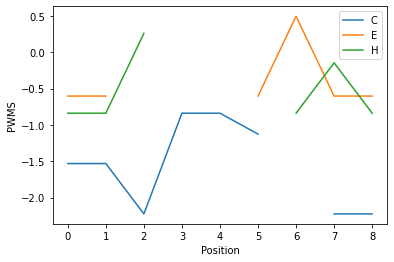

In [63]:
fig, ax = plt.subplots()
for i in range(len(SS_TYPES)):
    ax.plot(pwm[:, i], label=SS_TYPES[i])
ax.set_xlabel('Position')
ax.set_ylabel('PWMS')
ax.set_xticks(np.arange(len(seqs[0])))
ax.set_xticklabels(np.arange(len(seqs[0])))
ax.legend()
plt.show()